# Importing Dependecies


In [117]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0



In [118]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
 

In [119]:
#load data
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [121]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [122]:
# distribution of legit transaction & fraud
data["Class"].value_counts()  
# data is highly unbalace
# 0-->Normal
# 1--> Fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [123]:
# Separting the data  for analyis
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [124]:
legit.shape,fraud.shape

((284315, 31), (492, 31))

In [125]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [126]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Imbalaced Datasets

In [127]:
X=data.drop(columns="Class",axis=1)
Y=data["Class"]

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=42)

In [129]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_train

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


265518    0
180305    0
42664     0
198723    0
82325     0
         ..
233802    0
85418     0
29062     0
13766     0
17677     0
Name: Class, Length: 227845, dtype: int64

In [130]:
X_train_prediction = model.predict(X_train)

print(f"Accuracy of Train : {accuracy_score(Y_train, X_train_prediction)}")
print(f"F1 Score of Train : {f1_score(Y_train, X_train_prediction)}")

Accuracy of Train : 0.9989203186376704
F1 Score of Train : 0.6893939393939393


In [131]:
X_test_prediction = model.predict(X_test)

print(f"Accuracy of Test : {accuracy_score(Y_test, X_test_prediction)}")
print(f"F1 Score of Test : {f1_score(Y_test, X_test_prediction)}")

Accuracy of Test : 0.9989817773252344
F1 Score of Test : 0.7128712871287128


In [132]:
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.73      0.71        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56832    32]
 [   26    72]]


Text(0.5, 1.0, 'Confusion Matrix - Test')

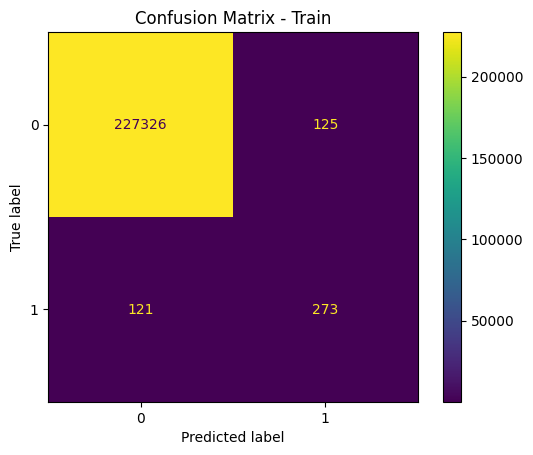

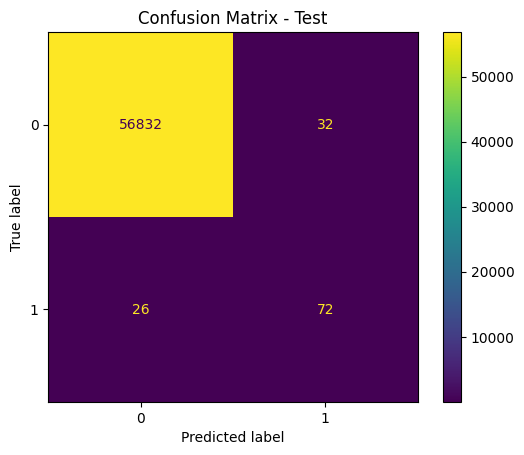

In [133]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train confusion matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
disp_train.ax_.set_title("Confusion Matrix - Train")

# Test confusion matrix
cm_test = confusion_matrix(Y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
disp_test.ax_.set_title("Confusion Matrix - Test")


# under_Sampling

In [134]:
legit_under_sample=legit.sample(n=492)

In [135]:
new_under_sample_dataset=pd.concat([legit_under_sample,fraud],axis=0)

In [136]:
new_under_sample_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118643,75157.0,-0.388290,1.103373,1.296108,0.074493,0.099744,-0.984104,0.754932,-0.107695,-0.489248,...,-0.247285,-0.641600,0.008643,0.349980,-0.133778,0.069485,0.244797,0.101237,12.58,0
261617,160104.0,1.944505,-0.068869,-2.366393,0.110983,0.998334,-0.113445,0.258164,-0.154772,0.250450,...,0.229815,0.627353,-0.212284,-0.387214,0.385712,-0.099872,-0.022174,-0.029170,84.59,0
46859,42957.0,1.539025,-0.787238,-0.273705,-1.535930,-0.836190,-0.817200,-0.498963,-0.300221,-2.556870,...,-0.132665,0.022618,-0.145539,0.030415,0.722461,-0.083137,-0.002402,-0.004959,15.00,0
44054,41768.0,-0.717427,-3.468358,0.084280,0.955867,-1.711766,1.232775,0.290128,0.275804,0.840400,...,0.430734,-0.603584,-0.682557,-0.184120,-0.396997,0.855515,-0.180882,0.158518,935.95,0
32979,37040.0,-1.116624,-0.113825,1.164706,1.068759,0.542018,-0.345515,1.195639,-0.358953,-0.431803,...,0.088867,0.724697,0.636660,0.082587,-0.162984,-0.313841,0.039563,-0.157153,126.00,0


In [137]:
new_under_sample_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86461.880081,-2.374010,1.797030,-3.505904,2.269605,-1.591367,-0.721132,-2.780415,0.316553,-1.296365,...,0.349367,-0.010104,-0.013979,-0.066491,0.032898,0.056581,0.097727,0.040077,105.229400,0.500000
std,47363.062890,5.532378,3.693999,6.219529,3.197952,4.196943,1.688133,5.844686,4.849257,2.309240,...,2.786373,1.160302,1.182087,0.570407,0.662363,0.484010,0.997258,0.419321,231.589911,0.500254
min,406.000000,-30.552380,-8.481835,-31.103685,-4.210100,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.511475,-4.781606,-1.351128,-7.263482,-1.869290,0.000000,0.000000
25%,45962.000000,-2.877893,-0.150544,-5.084967,-0.055241,-1.793109,-1.564579,-3.078361,-0.190100,-2.345829,...,-0.194566,-0.546104,-0.221854,-0.405540,-0.293354,-0.263980,-0.060510,-0.058466,1.790000,0.000000
50%,77758.500000,-0.751057,0.916088,-1.343771,1.289350,-0.452204,-0.648857,-0.632321,0.181232,-0.684232,...,0.130060,-0.010887,-0.031389,-0.005344,0.069679,0.027553,0.055276,0.033203,18.130000,0.500000
75%,131626.500000,1.088600,2.819765,0.345462,4.207015,0.470516,0.060238,0.271065,0.856881,0.132775,...,0.632799,0.548894,0.190727,0.358448,0.386380,0.366920,0.452145,0.217785,99.990000,1.000000
max,170486.000000,2.352089,22.057729,3.341309,12.114672,11.095089,6.474115,5.802537,20.007208,5.713140,...,27.202839,8.361985,5.466230,3.034593,2.365360,2.745261,3.052358,2.016592,2235.000000,1.000000


In [138]:
new_under_sample_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [139]:
# split data in (feature,traget)
X=new_under_sample_dataset.drop(columns="Class",axis=1)
Y=new_under_sample_dataset["Class"]

In [140]:
# Spilt  data into Training data & Test Data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [141]:
X.shape,X_train.shape,X_test.shape

((984, 30), (787, 30), (197, 30))

In [142]:
model=LogisticRegression()

In [143]:
#train model
model.fit(X_train,Y_train)

LogisticRegression()

In [144]:
X_train_prediction = model.predict(X_train)

print(f"Accuracy of Train : {accuracy_score(Y_train, X_train_prediction)}")
print(f"F1 Score of Train : {f1_score(Y_train, X_train_prediction)}")

Accuracy of Train : 0.9390088945362135
F1 Score of Train : 0.9375


In [145]:
X_test_prediction = model.predict(X_test)

print(f"Accuracy of Test : {accuracy_score(Y_test, X_test_prediction)}")
print(f"F1 Score of Test : {f1_score(Y_test, X_test_prediction)}")

Accuracy of Test : 0.9644670050761421
F1 Score of Test : 0.9637305699481866


In [146]:
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Confusion Matrix:
 [[97  2]
 [ 5 93]]


Text(0.5, 1.0, 'Confusion Matrix - Test')

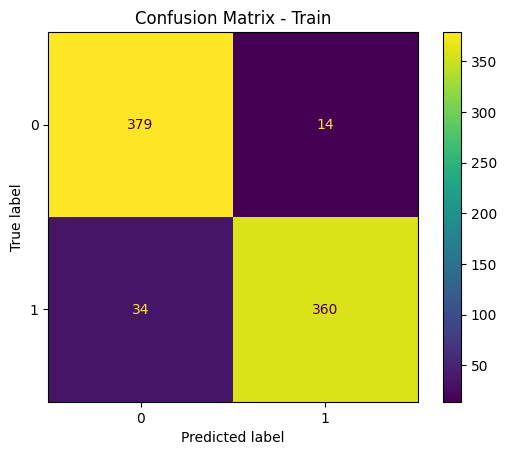

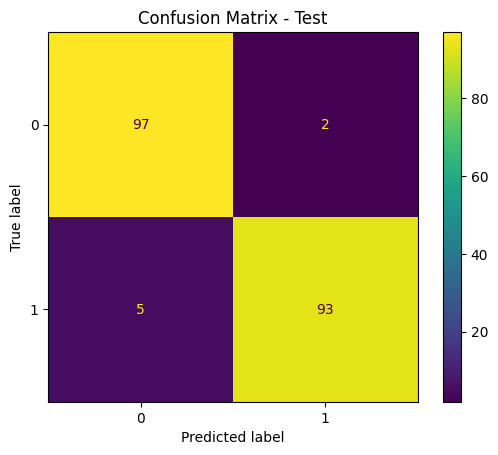

In [147]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train confusion matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
disp_train.ax_.set_title("Confusion Matrix - Train")

# Test confusion matrix
cm_test = confusion_matrix(Y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
disp_test.ax_.set_title("Confusion Matrix - Test")


# Over_Sampling

In [148]:
legit.shape,fraud.shape 

((284315, 31), (492, 31))

In [149]:
fraud_over_sampling=fraud.sample(284315,replace=True)

In [150]:
over_sampling_dataset=pd.concat([legit,fraud_over_sampling],axis=0)

In [151]:
X=over_sampling_dataset.drop(columns="Class",axis=1)
Y=over_sampling_dataset["Class"]

In [152]:
# Spilt  data into Training data & Test Data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [153]:
X.shape,X_train.shape,X_test.shape

((568630, 30), (454904, 30), (113726, 30))

In [154]:
X_train_prediction = model.predict(X_train)

print(f"Accuracy of Train : {accuracy_score(Y_train, X_train_prediction)}")
print(f"F1 Score of Train : {f1_score(Y_train, X_train_prediction)}")

Accuracy of Train : 0.9394113922937587
F1 Score of Train : 0.9382895166959971


In [155]:
X_test_prediction = model.predict(X_test)

print(f"Accuracy of Test : {accuracy_score(Y_test, X_test_prediction)}")
print(f"F1 Score of Test : {f1_score(Y_test, X_test_prediction)}")

Accuracy of Test : 0.9391959622249969
F1 Score of Test : 0.9381113905471079


In [156]:
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     56863
           1       0.96      0.92      0.94     56863

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726

Confusion Matrix:
 [[54402  2461]
 [ 4454 52409]]


Text(0.5, 1.0, 'Confusion Matrix - Test')

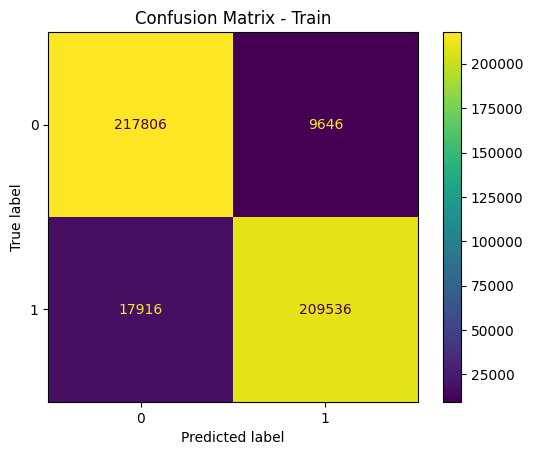

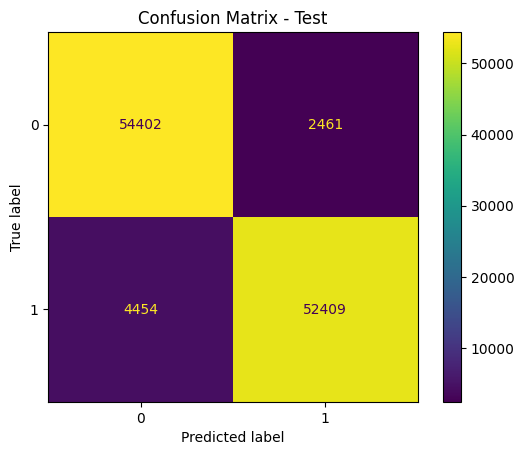

In [157]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train confusion matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
disp_train.ax_.set_title("Confusion Matrix - Train")

# Test confusion matrix
cm_test = confusion_matrix(Y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
disp_test.ax_.set_title("Confusion Matrix - Test")


# Smote

In [158]:
X=data.drop(columns="Class",axis=1)
Y=data["Class"]

In [159]:
Y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [160]:
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_sm, Y_sm = smote.fit_resample(X, Y)


In [161]:
Y_sm.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [162]:
# Spilt  data into Training data & Test Data
X_train,X_test,Y_train,Y_test= train_test_split(X_sm, Y_sm,test_size=0.2,stratify=Y_sm,random_state=42)

In [163]:
X_train_prediction = model.predict(X_train)

print(f"Accuracy of Train : {accuracy_score(Y_train, X_train_prediction)}")
print(f"F1 Score of Train : {f1_score(Y_train, X_train_prediction)}")

Accuracy of Train : 0.967006225489334
F1 Score of Train : 0.9673139701254608


In [164]:
X_test_prediction = model.predict(X_test)

print(f"Accuracy of Test : {accuracy_score(Y_test, X_test_prediction)}")
print(f"F1 Score of Test : {f1_score(Y_test, X_test_prediction)}")

Accuracy of Test : 0.9674392838928653
F1 Score of Test : 0.9677845926312585


In [165]:
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     56863
           1       0.96      0.98      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
 [[54402  2461]
 [ 1242 55621]]


Text(0.5, 1.0, 'Confusion Matrix - Test')

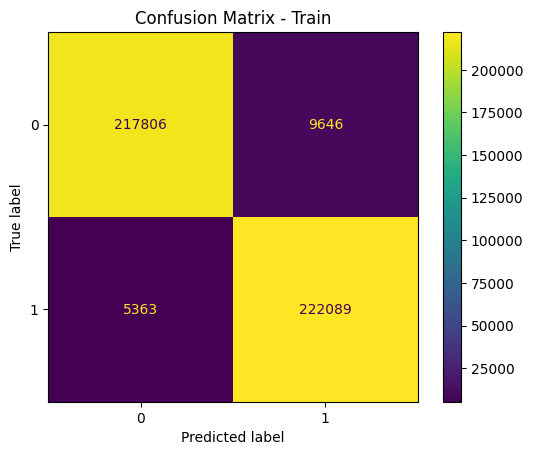

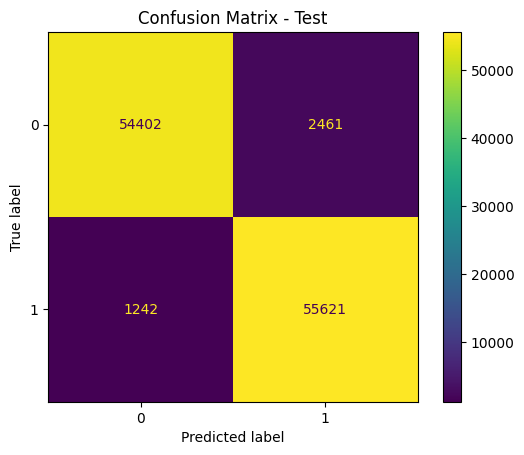

In [166]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train confusion matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
disp_train.ax_.set_title("Confusion Matrix - Train")

# Test confusion matrix
cm_test = confusion_matrix(Y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
disp_test.ax_.set_title("Confusion Matrix - Test")

# Use of Ensemple with Undersampling

In [167]:
X=data.drop(columns="Class",axis=1)
Y=data["Class"]

In [168]:
# Spilt  data into Training data & Test Data
X_train,X_test,Y_train,Y_test= train_test_split(X, Y,test_size=0.2,stratify=Y,random_state=42)

In [169]:
Y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [171]:

clf = EasyEnsembleClassifier(n_estimators=50, random_state=42)

 
clf.fit(X_train, Y_train)

 
y_pred = clf.predict(X_test)

 
 
 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
 [[55003  1861]
 [    8    90]]


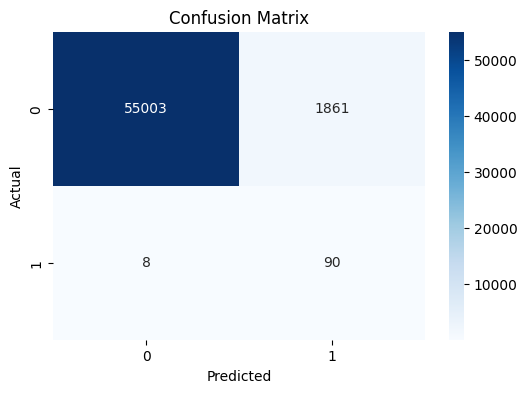

In [172]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
